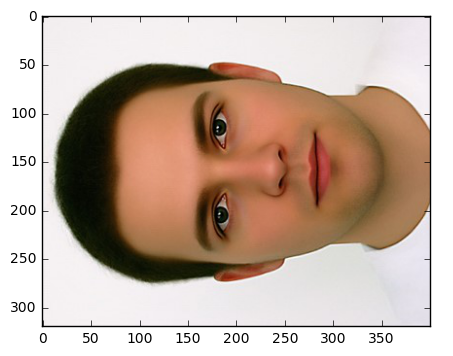

In [2]:
##use this script to compare the cross-correlation and SAD difference

import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

face = misc.imread("face.jpg")
plt.imshow(face)
plt.show()

In [3]:
print "face shape: ", face.shape


face shape:  (320L, 400L, 3L)


(20L, 25L)


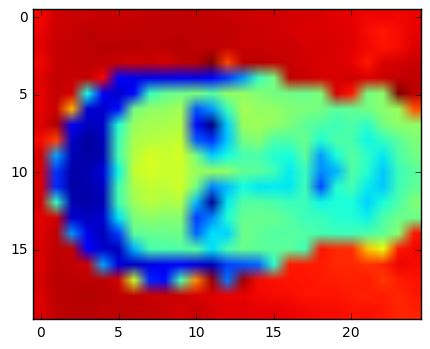

In [18]:
data = face[0:320:16, 0:400:16, 1]
print data.shape
plt.imshow(data)
plt.show()

In [9]:
line_data = data.flatten()
print line_data.shape

(500L,)


13
[23922 24225 24354 23538 21148 16691 10009   260  9948 16629 21115 23444
 24360 24230 23963 24842 26667 28365 29817 30796 30545 29622 28691 26976
 25139 24027 24792 25997 25799 23853 20318 15841 12156 16036 20887 24403
 26527 26967 26122 25506 26165]
-13
-13
[703656 703180 701273 700267 710212 732376 763624 793303 763782 732188
 709880 699686 700365 702075 702238 699656 688402 678662 673149 672751
 673958 673814 676855 687604 698311 701223 697792 691260 687050 694512
 711383 733481 747948 733028 709280 691359 682295 685318 691310 694002
 691785]


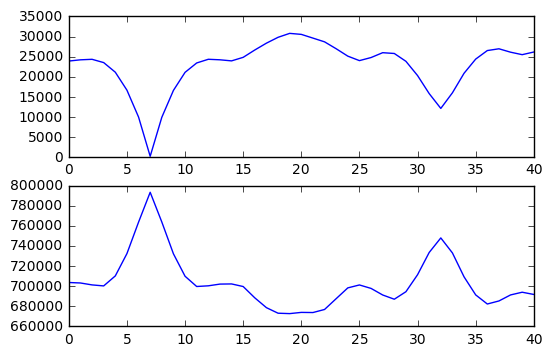

In [133]:
sad_range = 20
pixel_shift = np.random.randint(sad_range)
data_left = line_data[:-pixel_shift]
data_right = line_data[pixel_shift:]
print pixel_shift
size= data_left.size
means = 0
std = 1

noise = np.random.normal(means, std, size=size * 2)
data_left = data_left + noise[:size]
data_right = data_right + noise[size:]
np.clip(data_left, 0, 255, out=data_left);
np.clip(data_right, 0, 255, out=data_right);

sad_vector = np.zeros((2 * sad_range + 1), dtype=np.uint64)
for i in range(2 * sad_range + 1):
    for j in np.arange(sad_range, size - sad_range, 1):
        sad_vector[i] = sad_vector[i] + np.abs(data_left[j] - data_right[j + i - sad_range])
    
print sad_vector
print np.argmin(sad_vector) - sad_range
plt.subplot(2,1,1)
plt.plot(sad_vector)

ccf_vector = np.zeros((2 * sad_range + 1), dtype=np.uint64)
for i in range(2 * sad_range + 1):
    for j in np.arange(sad_range, size - sad_range, 1):
        temp = data_left[j] * data_right[j + i - sad_range]
        ccf_vector[i] = ccf_vector[i] + np.uint64(temp) / 16.0
print np.argmax(ccf_vector) - sad_range
print ccf_vector
plt.subplot(2,1,2)
plt.plot(ccf_vector)
plt.show()